In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [7]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
#full missing value
median = df['salary'].median()
median

265000.0

In [9]:
df['salary'].fillna(median, inplace =True)

In [10]:
df.isnull().sum()


sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

## Problem solve

### male and female

In [25]:
q1 = df['gender'].value_counts()
q1

gender
M    139
F     76
Name: count, dtype: int64

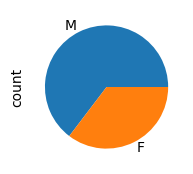

In [18]:
q1.plot(kind='pie', figsize=(3,2))
plt.ylabel = ""
plt.title = "Gender "

### placed male ad female 

In [27]:
q2 = df[df['status'] == 'Placed']['gender'].value_counts()
q2

gender
M    100
F     48
Name: count, dtype: int64

<Axes: ylabel='gender'>

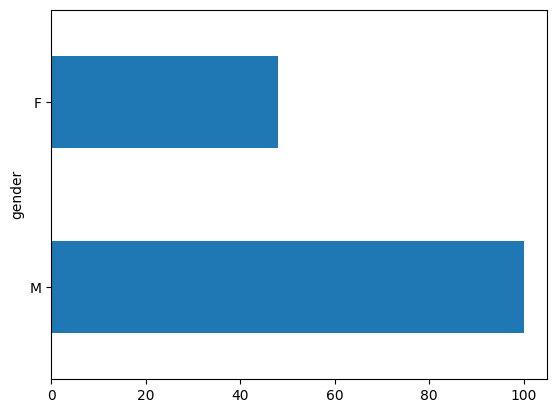

In [30]:
q2.plot(kind = 'barh')

In [57]:
male_percent = q2['M'].sum() * 100 / q2.sum()
female_percent =  q2['F'].sum() * 100 / q2.sum()
f'the percentage of male and female who got job {female_percent:.2f}% & {male_percent:.2f}% '

'the percentage of male and female who got job 32.43% & 67.57% '

### Arts student placement 

### 

In [56]:
q = df[(df['hsc_s'] == 'Arts') & (df['gender'] == 'M')].shape[0]
f'The number of Students in Arts who get job is :{q}'

'The number of Students in Arts who get job is :5'

### stream wise placement 

In [58]:
q4 = df[df['status'] == 'Placed']['hsc_s'].value_counts()
q4

hsc_s
Commerce    79
Science     63
Arts         6
Name: count, dtype: int64

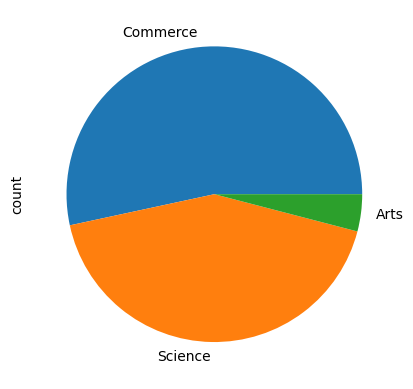

In [63]:
q4.plot(kind='pie')
plt.title = 'Stream Wise Placement '

### Question 5


In [78]:
q5 = df[(df['ssc_p'] > 60) & (df['hsc_p']> 60) & (df['status'] == 'Placed')].shape[0]

In [79]:
f'{q5} students got more 60% in ssc and hsc and got job.'

'121 students got more 60% in ssc and hsc and got job.'